In [1]:
# import libraries we need
import pandas as pd
import numpy as np

# all jupyter to display multiple outputs per cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# read in the data file, giving names to the columns, and specifying that these variables are categorical
colnames = ['rec_events','age_groups','menopause','tumor_size','inv_nodes','node_caps','deg_malig','breast','breast_quad','irradiat']
df = pd.read_csv('breast-cancer.data', header=None, names=colnames,
                 dtype={'menopause':'category','breast_quad':'category'} )
df

,rec_events,age_groups,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
...,...,...,...,...,...,...,...,...,...,...
281,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,no
282,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
283,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,no
284,recurrence-events,40-49,ge40,30-34,3-5,no,3,left,left_low,no


In [3]:
# Let's look at the range of values for each column
for i in range(10):
    list(df.iloc[:,i].unique())

['no-recurrence-events', 'recurrence-events']

['30-39', '40-49', '60-69', '50-59', '70-79', '20-29']

['premeno', 'ge40', 'lt40']

['30-34',
 '20-24',
 '15-19',
 '0-4',
 '25-29',
 '50-54',
 '10-14',
 '40-44',
 '35-39',
 '5-9',
 '45-49']

['0-2', '6-8', '9-11', '3-5', '15-17', '12-14', '24-26']

['no', 'yes', '?']

[3, 2, 1]

['left', 'right']

['left_low', 'right_up', 'left_up', 'right_low', 'central', '?']

['no', 'yes']

In [4]:
rec_events = {"recurrence-events" : 1, "no-recurrence-events" : 0}
age_groups = {"10-19" : 1, "20-29" : 2, "30-39" : 3, "40-49" : 4, "50-59" : 5, "60-69" : 6, "70-79" : 7, "80-89" : 8, "90-99" : 9}
#menopause = {"premeno" : 0, "lt40" : 1, "ge40" : 2}
tumor_size = {"0-4" : 1, "5-9" : 2, "10-14" : 3, "15-19" : 4, "20-24" : 5, "25-29" : 6, "30-34" : 7, "35-39" : 8, "40-44" : 9, "45-49" : 10, "50-54" : 11, "55-59" : 12}
inv_nodes = {"0-2" : 1, "3-5" : 2, "6-8" : 3, "9-11" : 4, "12-14" : 5, "15-17" : 6, "18-20" : 7, "21-23" : 8, "24-26" : 9, "27-29" : 10, "30-32" : 11, "33-35" : 12, "36-39" : 13}
#deg_malig = {"1" : 1, "2" : 2, "3" : 3}
#breast_quad = {"?" : 0, "left_up" : 1, "left_low" : 2, "right_up" : 3, "right_low" : 4, "central" : 5}
yesno = {'yes':1,'no':0,'?':0}

df_num = df

df['rec_events'] = df['rec_events'].map(rec_events)
df['age_groups'] = df['age_groups'].map(age_groups)
df['tumor_size'] = df['tumor_size'].map(tumor_size)
df['inv_nodes'] = df['inv_nodes'].map(inv_nodes)
df['node_caps'] = df['node_caps'].map(yesno) # yes is a 1, others 0
df['deg_malig'] = pd.to_numeric(df['deg_malig'])
df['breast'] = df['breast'].map({'right':1,'left':0}) # right is a 1, others 0
df['irradiat'] = df['irradiat'].map(yesno)

df.info()
df = pd.get_dummies(df) # one-hot encoding of the categorical variables.

df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   rec_events   286 non-null    int64   
 1   age_groups   286 non-null    int64   
 2   menopause    286 non-null    category
 3   tumor_size   286 non-null    int64   
 4   inv_nodes    286 non-null    int64   
 5   node_caps    286 non-null    int64   
 6   deg_malig    286 non-null    int64   
 7   breast       286 non-null    int64   
 8   breast_quad  286 non-null    category
 9   irradiat     286 non-null    int64   
dtypes: category(2), int64(8)
memory usage: 18.9 KB


,rec_events,age_groups,tumor_size,inv_nodes,node_caps,deg_malig,breast,irradiat,menopause_ge40,menopause_lt40,menopause_premeno,breast_quad_?,breast_quad_central,breast_quad_left_low,breast_quad_left_up,breast_quad_right_low,breast_quad_right_up
0,0,3,7,1,0,3,0,0,0,0,1,0,0,1,0,0,0
1,0,4,5,1,0,2,1,0,0,0,1,0,0,0,0,0,1
2,0,4,5,1,0,2,0,0,0,0,1,0,0,1,0,0,0
3,0,6,4,1,0,2,1,0,1,0,0,0,0,0,1,0,0
4,0,4,1,1,0,2,1,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,1,3,7,1,0,2,0,0,0,0,1,0,0,0,1,0,0
282,1,3,5,1,0,3,0,1,0,0,1,0,0,0,1,0,0
283,1,6,5,1,0,1,1,0,1,0,0,0,0,0,1,0,0
284,1,4,7,2,0,3,0,0,1,0,0,0,0,1,0,0,0


In [5]:
# https://towardsdatascience.com/understanding-random-forest-58381e0602d2
# https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

# Labels are the values we want to predict
labels = np.array(df['rec_events'])
# Remove the labels from the features
features = df.drop(columns='rec_events')
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [6]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets. random_state is the seed for the rng
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.1, random_state = 42)

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (257, 16)
Training Labels Shape: (257,)
Testing Features Shape: (29, 16)
Testing Labels Shape: (29,)


In [7]:
from scipy.stats.mstats import gmean

# The baseline prediction is the historical average for recurrence.
p = np.mean(train_labels)
print(f'Historically, {p*100:0.1f}% of women in the training set with breast cancer have recurrence events')
baseline_preds = np.full(test_labels.shape, p)

# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - test_labels)
print(f'Average baseline error in predicting test data set: {np.mean(baseline_errors):0.3f}')
print(f'Accuracy computed using geometric mean on test data: {gmean(1-baseline_errors)*100:0.3f}%')

Historically, 28.4% of women in the training set with breast cancer have recurrence events
Average baseline error in predicting test data set: 0.463
Accuracy computed using geometric mean on test data: 48.837%


In [8]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

In [9]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# these represent the model's predicted likelihood of the cancer recurring.
predictions

# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print(f'Mean Absolute Error for Random Forest Model: {np.mean(errors):0.3f}')
print(f'Accuracy computed using geometric mean on test data: {gmean(1-errors)*100:0.3f}%')

array([0.07146667, 0.684     , 0.32983333, 0.20926667, 0.38833333,
       0.353     , 0.07983333, 0.11333333, 0.05016667, 0.00406667,
       0.40436468, 0.001     , 0.485     , 0.891     , 0.027     ,
       0.5604    , 0.352     , 0.18685   , 0.10086667, 0.66766667,
       0.45075   , 0.05586667, 0.508     , 0.33606905, 0.05766667,
       0.648     , 0.326     , 0.12816667, 0.08553333])

Mean Absolute Error for Random Forest Model: 0.356
Accuracy computed using geometric mean on test data: 55.312%


<Figure size 7200x7200 with 0 Axes>

[Text(3094.8713235294117, 5254.8, 'X[4] <= 2.5\nmse = 0.195\nsamples = 159\nvalue = 0.265'),
 Text(1421.2132352941176, 4892.4, 'X[1] <= 3.5\nmse = 0.157\nsamples = 118\nvalue = 0.196'),
 Text(729.4117647058823, 4530.0, 'X[11] <= 0.5\nmse = 0.022\nsamples = 25\nvalue = 0.023'),
 Text(656.4705882352941, 4167.6, 'mse = 0.0\nsamples = 22\nvalue = 0.0'),
 Text(802.3529411764705, 4167.6, 'X[7] <= 0.5\nmse = 0.139\nsamples = 3\nvalue = 0.167'),
 Text(729.4117647058823, 3805.2, 'mse = 0.188\nsamples = 2\nvalue = 0.25'),
 Text(875.2941176470588, 3805.2, 'mse = 0.0\nsamples = 1\nvalue = 0.0'),
 Text(2113.0147058823527, 4530.0, 'X[14] <= 0.5\nmse = 0.187\nsamples = 93\nvalue = 0.248'),
 Text(2040.0735294117646, 4167.6, 'X[9] <= 0.5\nmse = 0.194\nsamples = 86\nvalue = 0.263'),
 Text(1021.1764705882352, 3805.2, 'X[1] <= 7.5\nmse = 0.149\nsamples = 37\nvalue = 0.182'),
 Text(765.8823529411765, 3442.8, 'X[4] <= 1.5\nmse = 0.101\nsamples = 30\nvalue = 0.114'),
 Text(692.9411764705882, 3080.4, 'mse = 0

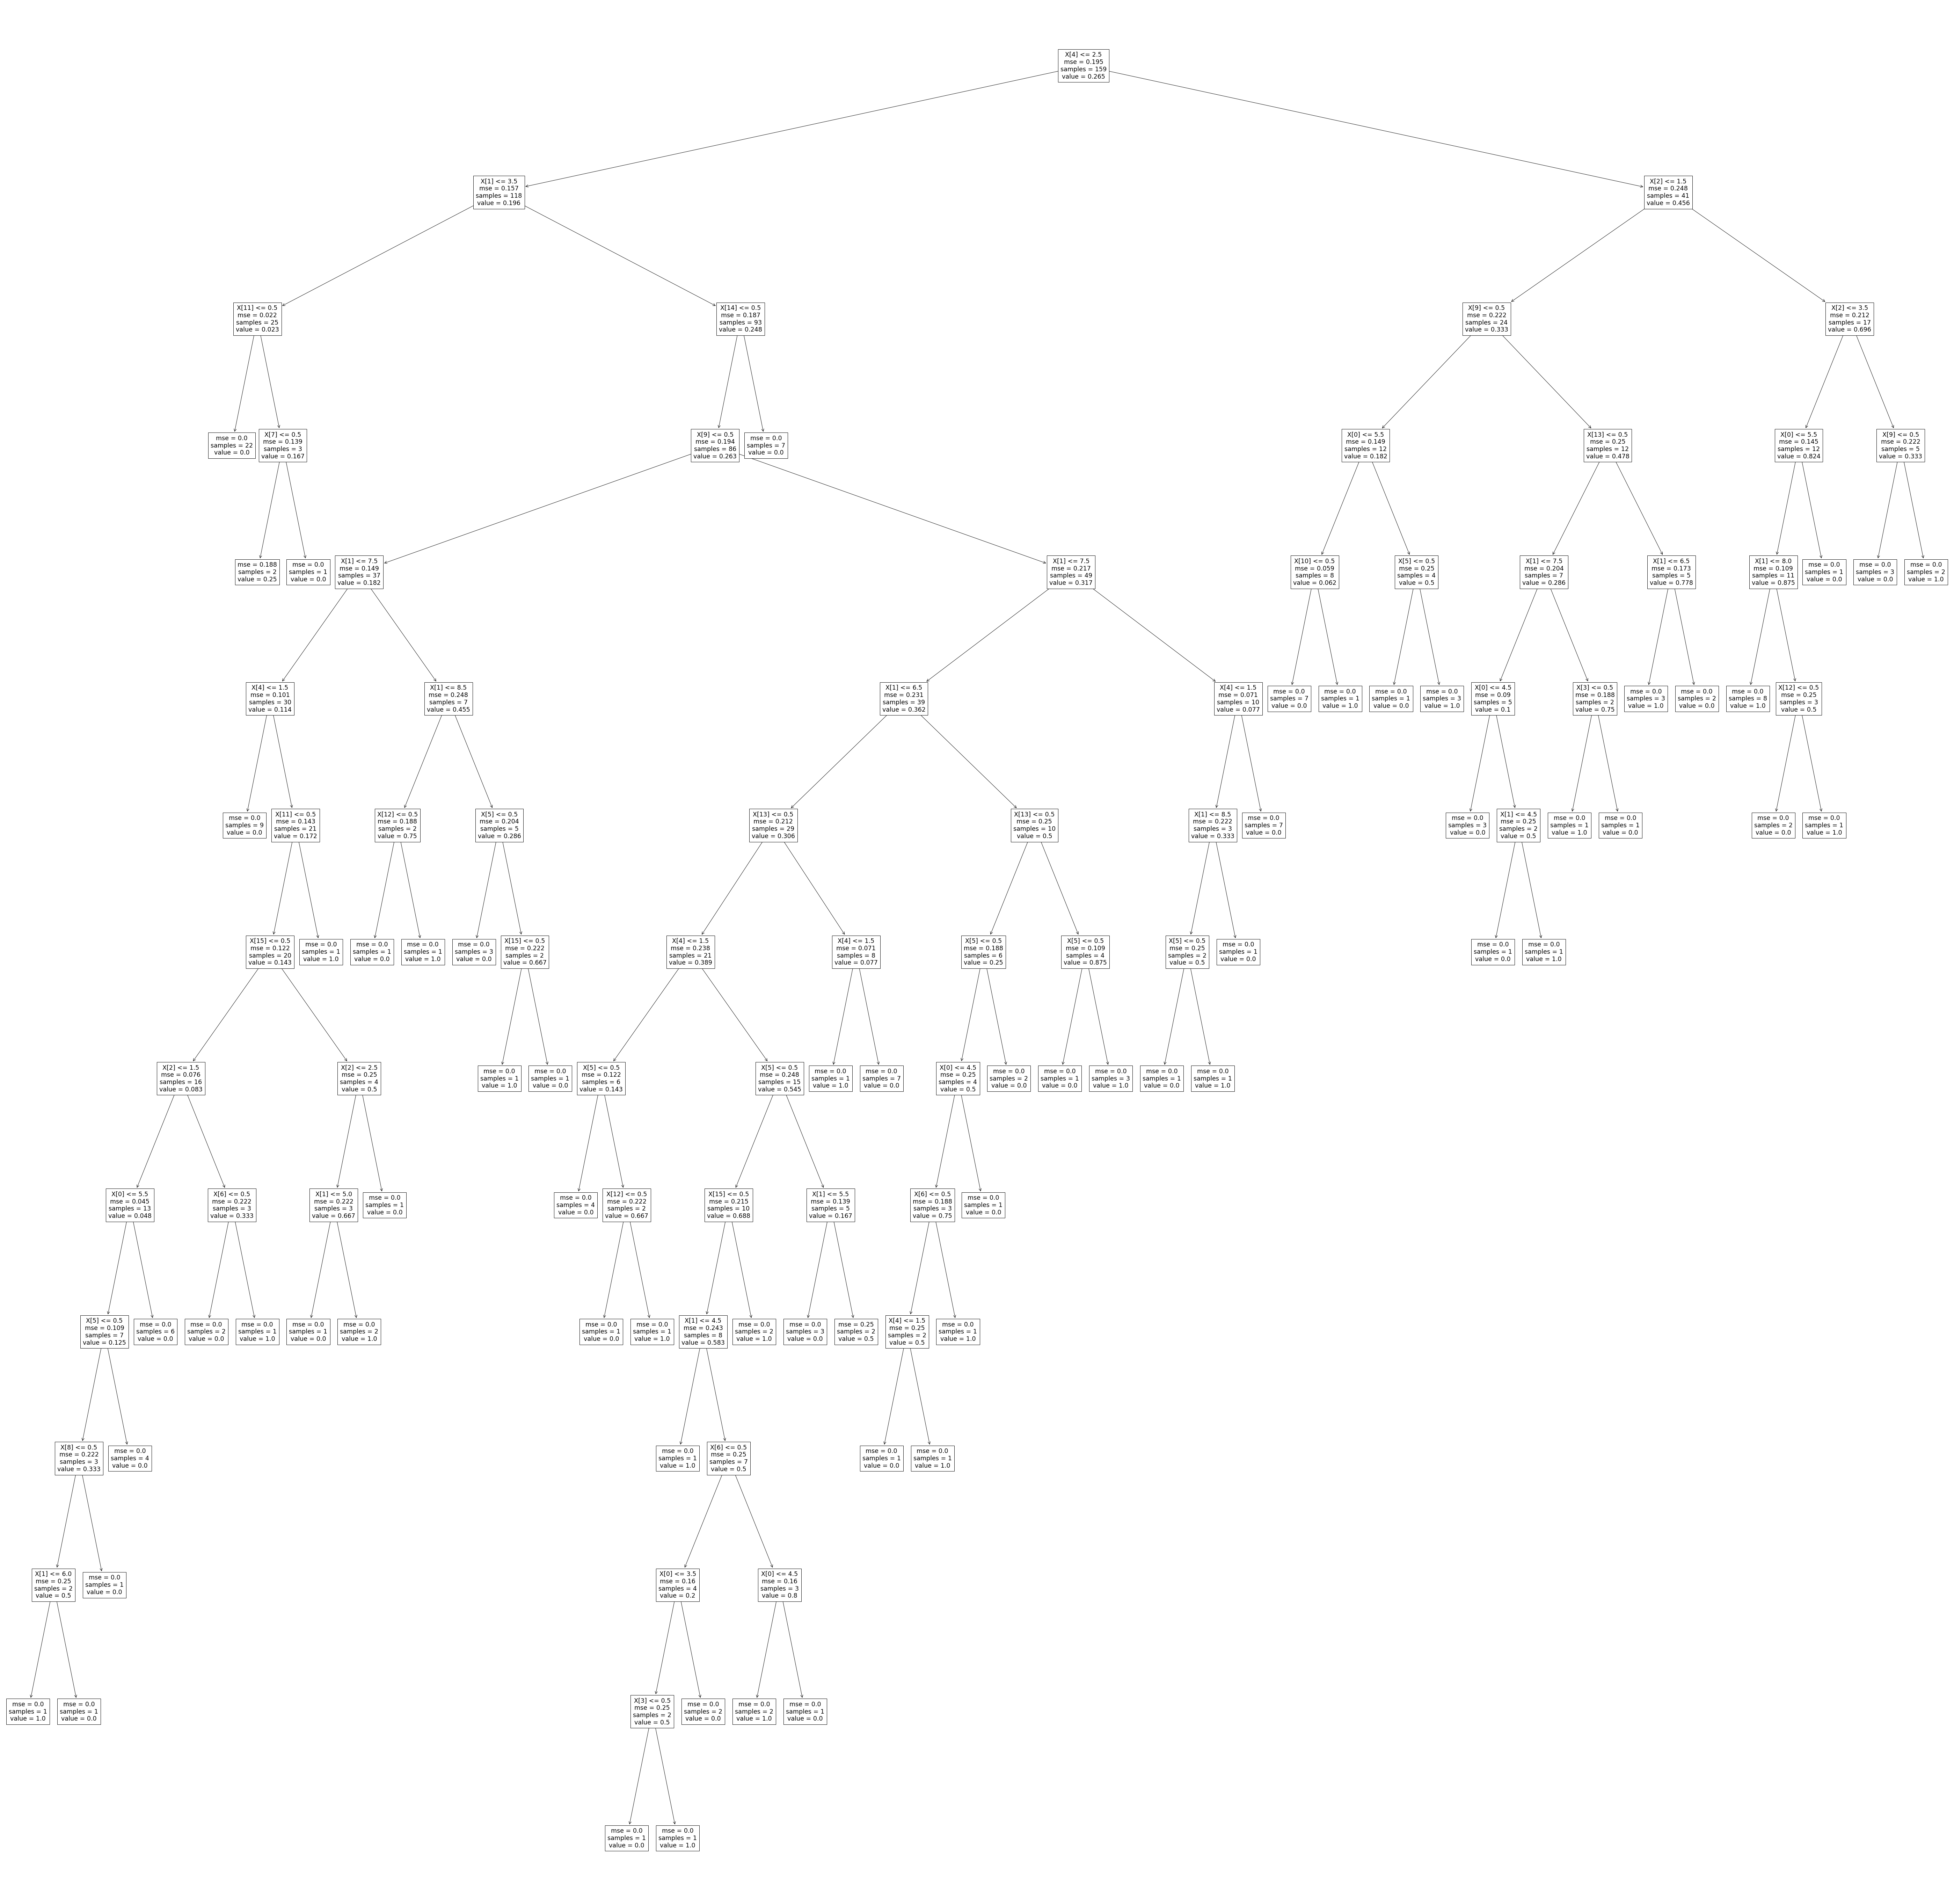

In [11]:
# Import tools needed for visualization
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Pull out one tree from the forest
tree = rf.estimators_[5]

# Plot image
plt.figure(figsize=[100,100])
plot_tree(tree)
plt.savefig('tree5.png')